In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
paths = glob.glob("./kfz_csv/*.csv")

In [3]:
dfs = []
for path in paths:
    year = int(path.replace("\\", "/").split("/")[-1].strip(".csv"))
    print(year)
    land = ""
    rb = ""
    data = []
    ofile = open(path,"r")
    header = ofile.readline()
    for line in ofile:
        if line[0].isdigit():
            data.append([year,land, rb] + line.replace("\n","").split(";"))
        elif line.startswith("RB"):
            rb = line.split(" ")[1].replace("\n","").split(";")[0]
        else:
            land = line.replace("\n","").split(";")[0]
    ofile.close()

    df = pd.DataFrame(data, columns = ["year","land", "rb"] + header.replace("\n","").split(";"))
    dfs.append(df)

2012
2013
2014
2015
2016
2017
2018
2019


In [4]:
df = pd.concat(dfs)

In [5]:
df

,year,land,rb,Stadt,Insgesamt,Benzin,Diesel,Gas (einschl. bivalent),Hybrid,Elektro,...,Euro 5,Euro 6,Sonstige2,Euro 1 2,Euro 2 2,Euro 3 2,Euro 4 2,Euro 5 2,Euro 6 2,Sonstige3
0,2012,SCHLESWIG-HOLSTEIN,,"01001 FLENSBURG,STADT",39433,26375,12601,448,,,...,5294,9,187,233,1667,3239,4692,2541,9,97
1,2012,SCHLESWIG-HOLSTEIN,,"01002 KIEL,STADT",99724,71185,27538,986,,,...,13421,30,836,679,3857,6995,9385,5991,30,427
2,2012,SCHLESWIG-HOLSTEIN,,"01003 LUEBECK,STADT",89654,65879,22799,1133,,,...,10900,30,646,551,3147,5919,7969,4727,30,307
3,2012,SCHLESWIG-HOLSTEIN,,"01004 NEUMUENSTER,STADT",37974,27051,10435,604,,,...,4441,9,165,204,1439,2791,3876,1960,9,71
4,2012,SCHLESWIG-HOLSTEIN,,01051 DITHMARSCHEN,72836,48921,23173,775,,,...,6780,21,518,539,4421,6876,8004,2912,21,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2019,THUERINGEN,ZUSAMMEN,16073 SAALFELD-RUDOLSTADT,60.204,41.610,17.795,,,,...,,,,,,,,,,
396,2019,THUERINGEN,ZUSAMMEN,16074 SAALE-HOLZLANDKREIS,49.320,33.522,14.962,,,,...,,,,,,,,,,
397,2019,THUERINGEN,ZUSAMMEN,16075 SAALE-ORLA-KREIS,50.304,33.773,15.944,,,,...,,,,,,,,,,
398,2019,THUERINGEN,ZUSAMMEN,16076 GREIZ,60.390,41.612,17.927,,,,...,,,,,,,,,,


In [6]:
df["Insgesamt"].head(5)

0    39433
1    99724
2    89654
3    37974
4    72836
Name: Insgesamt, dtype: object

In [7]:
df["land"].unique()

array(['SCHLESWIG-HOLSTEIN', 'HAMBURG', 'NIEDERSACHSEN', 'BREMEN',
       'NORDRHEIN-WESTFALEN', 'HESSEN', 'RHEINLAND-PFALZ',
       'BADEN-WUERTTEMBERG', 'BAYERN', 'SAARLAND', 'BERLIN',
       'BRANDENBURG', 'MECKLENBURG-VORPOMMERN', 'SACHSEN',
       'SACHSEN-ANHALT', 'THUERINGEN', 'BERLIN ', 'BRANDENBURG ',
       'BREMEN ', 'HAMBURG ', 'HESSEN ', 'MECKLENBURG-VORPOMMERN ',
       'NIEDERSACHSEN ', 'NORDRHEIN-WESTFALEN ', 'RHEINLAND-PFALZ ',
       'SAARLAND ', 'SACHSEN ', 'SACHSEN-ANHALT ', 'SCHLESWIG-HOLSTEIN ',
       'THUERINGEN '], dtype=object)

In [8]:
df["land"] = df["land"].str.strip(" ")

In [9]:
df[df["land"]=="SACHSEN-ANHALT"]

,year,land,rb,Stadt,Insgesamt,Benzin,Diesel,Gas (einschl. bivalent),Hybrid,Elektro,...,Euro 5,Euro 6,Sonstige2,Euro 1 2,Euro 2 2,Euro 3 2,Euro 4 2,Euro 5 2,Euro 6 2,Sonstige3
364,2012,SACHSEN-ANHALT,ZUSAMMEN,"15001 DESSAU-ROSSLAU,STADT",42134,33850,7632,700,,,...,5123,9,41887,88,699,2096,3120,1547,9,49
365,2012,SACHSEN-ANHALT,ZUSAMMEN,"15002 HALLE (SAALE),STADT",89588,71564,16641,1361,,,...,12078,28,88978,162,1290,4162,6953,3912,28,73
366,2012,SACHSEN-ANHALT,ZUSAMMEN,"15003 MAGDEBURG, STADT",103059,80614,21249,1212,,,...,14085,41,101278,220,1744,5209,8311,5507,41,148
367,2012,SACHSEN-ANHALT,ZUSAMMEN,15081 ALTMARKKREIS SALZWEDEL,50285,36980,12719,575,,,...,4425,5,49789,195,1840,3793,4907,1816,5,116
368,2012,SACHSEN-ANHALT,ZUSAMMEN,15082 ANHALT-BITTERFELD,93368,74688,17802,854,,,...,10121,10,92655,212,1761,5000,7362,3315,10,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2019,SACHSEN-ANHALT,ZUSAMMEN,15087 MANSFELD-SUEDHARZ,79.807,56.375,22.499,,,,...,,,,,,,,,,
358,2019,SACHSEN-ANHALT,ZUSAMMEN,15088 SAALEKREIS,113.461,80.909,30.686,,,,...,,,,,,,,,,
359,2019,SACHSEN-ANHALT,ZUSAMMEN,15089 SALZLANDKREIS,105.119,76.090,27.397,,,,...,,,,,,,,,,
360,2019,SACHSEN-ANHALT,ZUSAMMEN,15090 STENDAL,63.397,41.547,20.991,,,,...,,,,,,,,,,


#### Turn columns to numeric values
* remove '.' so it can be read as float

In [10]:
df.drop(axis=1, columns = header.replace("\n","").split(";")[4:], inplace=True)

In [11]:
df[["Insgesamt", "Benzin", "Diesel"]].describe()

,Insgesamt,Benzin,Diesel
count,3205,3205,3205
unique,3186,3183,3166
top,40.774,50.932,18.219
freq,2,2,2


In [12]:
#####

for head in header.replace("\n","").split(";")[1:4]:
    df[head] = pd.to_numeric(df[head].str.replace(".", ""))
    

In [13]:
df["Insgesamt"]

0      39433
1      99724
2      89654
3      37974
4      72836
       ...  
395    60204
396    49320
397    50304
398    60390
399    51330
Name: Insgesamt, Length: 3205, dtype: int64

* split "Stadt" column into "kennzahl" and "ort" 
* by splitting each row by " " (space)
* add as new columns

In [14]:
def splits(val):
    return val[:5]
    
df["kennzahl"] = df["Stadt"].apply(splits)

In [15]:
def splits2(val):
    return val[5:].strip(" ")
    
df["ort"] = df["Stadt"].apply(splits2)

In [16]:
df["kennzahl"]

0      01001
1      01002
2      01003
3      01004
4      01051
       ...  
395    16073
396    16074
397    16075
398    16076
399    16077
Name: kennzahl, Length: 3205, dtype: object

In [17]:
df["ort"]

0          FLENSBURG,STADT
1               KIEL,STADT
2            LUEBECK,STADT
3        NEUMUENSTER,STADT
4             DITHMARSCHEN
              ...         
395    SAALFELD-RUDOLSTADT
396    SAALE-HOLZLANDKREIS
397       SAALE-ORLA-KREIS
398                  GREIZ
399       ALTENBURGER LAND
Name: ort, Length: 3205, dtype: object

In [18]:
df

,year,land,rb,Stadt,Insgesamt,Benzin,Diesel,kennzahl,ort
0,2012,SCHLESWIG-HOLSTEIN,,"01001 FLENSBURG,STADT",39433,26375,12601,01001,"FLENSBURG,STADT"
1,2012,SCHLESWIG-HOLSTEIN,,"01002 KIEL,STADT",99724,71185,27538,01002,"KIEL,STADT"
2,2012,SCHLESWIG-HOLSTEIN,,"01003 LUEBECK,STADT",89654,65879,22799,01003,"LUEBECK,STADT"
3,2012,SCHLESWIG-HOLSTEIN,,"01004 NEUMUENSTER,STADT",37974,27051,10435,01004,"NEUMUENSTER,STADT"
4,2012,SCHLESWIG-HOLSTEIN,,01051 DITHMARSCHEN,72836,48921,23173,01051,DITHMARSCHEN
...,...,...,...,...,...,...,...,...,...
395,2019,THUERINGEN,ZUSAMMEN,16073 SAALFELD-RUDOLSTADT,60204,41610,17795,16073,SAALFELD-RUDOLSTADT
396,2019,THUERINGEN,ZUSAMMEN,16074 SAALE-HOLZLANDKREIS,49320,33522,14962,16074,SAALE-HOLZLANDKREIS
397,2019,THUERINGEN,ZUSAMMEN,16075 SAALE-ORLA-KREIS,50304,33773,15944,16075,SAALE-ORLA-KREIS
398,2019,THUERINGEN,ZUSAMMEN,16076 GREIZ,60390,41612,17927,16076,GREIZ


In [19]:
df["ort"]

0          FLENSBURG,STADT
1               KIEL,STADT
2            LUEBECK,STADT
3        NEUMUENSTER,STADT
4             DITHMARSCHEN
              ...         
395    SAALFELD-RUDOLSTADT
396    SAALE-HOLZLANDKREIS
397       SAALE-ORLA-KREIS
398                  GREIZ
399       ALTENBURGER LAND
Name: ort, Length: 3205, dtype: object

#### Load sticktoff dataset

In [20]:
stickstoff = pd.read_pickle("stickstoff_daten.pkl")

In [21]:
stickstoff

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert,umgebungstyp_grob
0,BRANDENBURG,2002,'DEBB001',BURG (SPREEWALD),vorstädtisches Gebiet,Hintergrund,10.0,69,vorstädtisch
1,BRANDENBURG,2002,'DEBB006',COTTBUS-SÜD,städtisches Gebiet,Hintergrund,19.0,107,städtisch
2,BRANDENBURG,2002,'DEBB009',FORST,vorstädtisches Gebiet,Hintergrund,16.0,83,vorstädtisch
3,BRANDENBURG,2002,'DEBB021',POTSDAM-ZENTRUM,städtisches Gebiet,Hintergrund,21.0,111,städtisch
4,BRANDENBURG,2002,'DEBB024',SENFTENBERG,städtisches Gebiet,Hintergrund,19.0,113,städtisch
...,...,...,...,...,...,...,...,...,...
8681,UMWELTBUNDESAMT,2019,DEUB004,SCHAUINSLAND,ländlich regional,Hintergrund,2.0,0,ländlich
8682,UMWELTBUNDESAMT,2019,DEUB029,SCHMÜCKE,ländlich Gebiet,Hintergrund,3.0,0,ländlich
8683,UMWELTBUNDESAMT,2019,DEUB005,WALDHOF,ländlich Gebiet,Hintergrund,7.0,0,ländlich
8684,UMWELTBUNDESAMT,2019,DEUB001,WESTERLAND,ländlich Gebiet,Hintergrund,5.0,0,ländlich


* get only first "word" from sticksplit.name and kraftsplit.ort 
* for potential merging
* try to split by ' ', '-', '/', ','

In [22]:
sticksplit = stickstoff["name"].str.split(" ").str[0].str.split("-").str[0].str.split("/").str[0].str.split(",").str[0]

In [23]:
kraftsplit = df["ort"].str.split(" ").str[0].str.split("-").str[0].str.split("/").str[0].str.split(",").str[0]

* try to match the new series objects sticksplit and kraftsplit
* count matches and non matches

In [24]:
match = 0
no_match = 0
count = 0

isin = False
for index, row in sticksplit.iteritems():
    isin = False
    for index2, row2 in kraftsplit.iteritems():
        if row == row2:
            isin = True
            #print(row, row2)
    if isin:
        match+=1
        count += 1
    else:
        no_match +=1

In [25]:
match

4344

In [26]:
no_match

4341

In [27]:
sticksplit

0               BURG
1            COTTBUS
2              FORST
3            POTSDAM
4        SENFTENBERG
            ...     
8681    SCHAUINSLAND
8682        SCHMÜCKE
8683         WALDHOF
8684      WESTERLAND
8685          ZINGST
Name: name, Length: 8685, dtype: object

In [28]:
kraftsplit

0         FLENSBURG
1              KIEL
2           LUEBECK
3       NEUMUENSTER
4      DITHMARSCHEN
           ...     
395        SAALFELD
396           SAALE
397           SAALE
398           GREIZ
399     ALTENBURGER
Name: ort, Length: 3205, dtype: object

# Insert proper year variable (im moment nur ein Jahr/File)

In [29]:
df

,year,land,rb,Stadt,Insgesamt,Benzin,Diesel,kennzahl,ort
0,2012,SCHLESWIG-HOLSTEIN,,"01001 FLENSBURG,STADT",39433,26375,12601,01001,"FLENSBURG,STADT"
1,2012,SCHLESWIG-HOLSTEIN,,"01002 KIEL,STADT",99724,71185,27538,01002,"KIEL,STADT"
2,2012,SCHLESWIG-HOLSTEIN,,"01003 LUEBECK,STADT",89654,65879,22799,01003,"LUEBECK,STADT"
3,2012,SCHLESWIG-HOLSTEIN,,"01004 NEUMUENSTER,STADT",37974,27051,10435,01004,"NEUMUENSTER,STADT"
4,2012,SCHLESWIG-HOLSTEIN,,01051 DITHMARSCHEN,72836,48921,23173,01051,DITHMARSCHEN
...,...,...,...,...,...,...,...,...,...
395,2019,THUERINGEN,ZUSAMMEN,16073 SAALFELD-RUDOLSTADT,60204,41610,17795,16073,SAALFELD-RUDOLSTADT
396,2019,THUERINGEN,ZUSAMMEN,16074 SAALE-HOLZLANDKREIS,49320,33522,14962,16074,SAALE-HOLZLANDKREIS
397,2019,THUERINGEN,ZUSAMMEN,16075 SAALE-ORLA-KREIS,50304,33773,15944,16075,SAALE-ORLA-KREIS
398,2019,THUERINGEN,ZUSAMMEN,16076 GREIZ,60390,41612,17927,16076,GREIZ


In [30]:
stickstoff

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert,umgebungstyp_grob
0,BRANDENBURG,2002,'DEBB001',BURG (SPREEWALD),vorstädtisches Gebiet,Hintergrund,10.0,69,vorstädtisch
1,BRANDENBURG,2002,'DEBB006',COTTBUS-SÜD,städtisches Gebiet,Hintergrund,19.0,107,städtisch
2,BRANDENBURG,2002,'DEBB009',FORST,vorstädtisches Gebiet,Hintergrund,16.0,83,vorstädtisch
3,BRANDENBURG,2002,'DEBB021',POTSDAM-ZENTRUM,städtisches Gebiet,Hintergrund,21.0,111,städtisch
4,BRANDENBURG,2002,'DEBB024',SENFTENBERG,städtisches Gebiet,Hintergrund,19.0,113,städtisch
...,...,...,...,...,...,...,...,...,...
8681,UMWELTBUNDESAMT,2019,DEUB004,SCHAUINSLAND,ländlich regional,Hintergrund,2.0,0,ländlich
8682,UMWELTBUNDESAMT,2019,DEUB029,SCHMÜCKE,ländlich Gebiet,Hintergrund,3.0,0,ländlich
8683,UMWELTBUNDESAMT,2019,DEUB005,WALDHOF,ländlich Gebiet,Hintergrund,7.0,0,ländlich
8684,UMWELTBUNDESAMT,2019,DEUB001,WESTERLAND,ländlich Gebiet,Hintergrund,5.0,0,ländlich


In [31]:
stickstoff["split"] = sticksplit
df["split"] = kraftsplit

In [32]:
df.rename(columns={"land":"bundesland", "year":"jahr"}, inplace=True)
stickstoff["jahr"] = pd.to_numeric(stickstoff["jahr"])

In [33]:
result = pd.merge(left=stickstoff, right=df, on=["jahr", "bundesland", "split"])

In [34]:
result.shape

(2523, 17)

In [35]:
result

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert,umgebungstyp_grob,split,rb,Stadt,Insgesamt,Benzin,Diesel,kennzahl,ort
0,BADEN-WUERTTEMBERG,2012,DEBW076,BADEN-BADEN,vorstädtisches Gebiet,Hintergrund,15.0,0,vorstädtisch,BADEN,KARLSRUHE,"08211 BADEN-BADEN,STADT",31179,21411,9555,08211,"BADEN-BADEN,STADT"
1,BADEN-WUERTTEMBERG,2012,DEBW046,BIBERACH,vorstädtisches Gebiet,Hintergrund,19.0,0,vorstädtisch,BIBERACH,TUEBINGEN,08426 BIBERACH,110593,72949,36744,08426,BIBERACH
2,BADEN-WUERTTEMBERG,2012,DEBW084,FREIBURG,städtisches Gebiet,Hintergrund,19.0,0,städtisch,FREIBURG,FREIBURG,08311 FREIBURG I.BREISG.STADT,85591,56824,27764,08311,FREIBURG I.BREISG.STADT
3,BADEN-WUERTTEMBERG,2012,DEBW122,FREIBURG SCHWARZWALDSTRASSE (V),städtisches Gebiet,Verkehr,65.0,0,städtisch,FREIBURG,FREIBURG,08311 FREIBURG I.BREISG.STADT,85591,56824,27764,08311,FREIBURG I.BREISG.STADT
4,BADEN-WUERTTEMBERG,2012,DEBW127,FREIBURG ZÄHRINGER STRASSE (S),städtisches Gebiet,Verkehr,50.0,---,städtisch,FREIBURG,FREIBURG,08311 FREIBURG I.BREISG.STADT,85591,56824,27764,08311,FREIBURG I.BREISG.STADT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,THUERINGEN,2019,DETH102,SUHL DR.TH.-NEUBAUER-STR.,städtisches Gebiet,Verkehr,29.0,--- 1),städtisch,SUHL,ZUSAMMEN,"16054 SUHL, STADT",20424,13866,6174,16054,"SUHL, STADT"
2519,THUERINGEN,2019,DETH072,SUHL F.-KÖNIG-STR,städtisches Gebiet,Verkehr,22.0,0,städtisch,SUHL,ZUSAMMEN,"16054 SUHL, STADT",20424,13866,6174,16054,"SUHL, STADT"
2520,THUERINGEN,2019,DETH101,WEIMAR JENAER STR.,städtisches Gebiet,Verkehr,28.0,--- 1),städtisch,WEIMAR,ZUSAMMEN,"16055 WEIMAR, STADT",29074,19887,8662,16055,"WEIMAR, STADT"
2521,THUERINGEN,2019,DETH093,WEIMAR SCHWANSEESTR.,städtisches Gebiet,Hintergrund,15.0,0,städtisch,WEIMAR,ZUSAMMEN,"16055 WEIMAR, STADT",29074,19887,8662,16055,"WEIMAR, STADT"


In [36]:
for id, item in df["Stadt"].iteritems():
    if "BERLIN" in item:
        print(item)

11000  BERLIN
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 


In [37]:
for id, item in df["split"].iteritems():
    if "BERLIN" in item:
        print(item)

BERLIN
BERLIN
BERLIN
BERLIN
BERLIN
BERLIN
BERLIN
BERLIN


In [38]:
result.groupby("umgebungstyp")["umgebungstyp"].count()

umgebungstyp
ländlich Gebiet            13
ländlich regional          48
ländlich stadtnah          39
städtisches Gebiet       2131
vorstädtisches Gebiet     292
Name: umgebungstyp, dtype: int64

In [39]:
result.groupby("emissionstyp")["emissionstyp"].count()

emissionstyp
Hintergrund    1025
Industrie       111
Verkehr        1387
Name: emissionstyp, dtype: int64

In [40]:
selection = result[result["emissionstyp"] == "Verkehr"]
result_clean = selection[["jahr","bundesland","split","jahresmittel","Insgesamt"]].copy()
result_clean["dieselanteil"] = selection["Diesel"] / selection["Insgesamt"]

In [41]:
result_clean

,jahr,bundesland,split,jahresmittel,Insgesamt,dieselanteil
3,2012,BADEN-WUERTTEMBERG,FREIBURG,65.0,85591,0.324380
4,2012,BADEN-WUERTTEMBERG,FREIBURG,50.0,85591,0.324380
6,2012,BADEN-WUERTTEMBERG,HEIDELBERG,51.0,55499,0.300348
7,2012,BADEN-WUERTTEMBERG,HEIDENHEIM,53.0,73503,0.299321
10,2012,BADEN-WUERTTEMBERG,KARLSRUHE,46.0,131995,0.312035
...,...,...,...,...,...,...
2517,2019,THUERINGEN,SAALFELD,28.0,60204,0.295578
2518,2019,THUERINGEN,SUHL,29.0,20424,0.302291
2519,2019,THUERINGEN,SUHL,22.0,20424,0.302291
2520,2019,THUERINGEN,WEIMAR,28.0,29074,0.297929


In [42]:
result_clean["location"] = result_clean["bundesland"] + " " + result_clean["split"]

In [43]:
result_clean["location"]

3         BADEN-WUERTTEMBERG FREIBURG
4         BADEN-WUERTTEMBERG FREIBURG
6       BADEN-WUERTTEMBERG HEIDELBERG
7       BADEN-WUERTTEMBERG HEIDENHEIM
10       BADEN-WUERTTEMBERG KARLSRUHE
                    ...              
2517              THUERINGEN SAALFELD
2518                  THUERINGEN SUHL
2519                  THUERINGEN SUHL
2520                THUERINGEN WEIMAR
2522                THUERINGEN WEIMAR
Name: location, Length: 1387, dtype: object

* remove all <0 Values

In [74]:
result_clean = result_clean[result_clean["jahresmittel"] > 0]

In [75]:
result_clean[result_clean["jahresmittel"] <0]

,jahr,bundesland,split,jahresmittel,Insgesamt,dieselanteil,location


In [76]:
years = [2012,2013,2014,2015,2016,2017,2018,2019]
year_df = []
for year in years:
    year_df.append(result_clean[result_clean["jahr"] == year])

In [77]:
sum_no2 = result_clean.groupby("location")[["jahresmittel","Insgesamt", "dieselanteil"]].mean()

In [78]:
sum_no2

,jahresmittel,Insgesamt,dieselanteil
location,,,
BADEN-WUERTTEMBERG ESSLINGEN,46.500000,322083.750000,0.328483
BADEN-WUERTTEMBERG FREIBURG,49.153846,88447.384615,0.352220
BADEN-WUERTTEMBERG HEIDELBERG,42.375000,58094.125000,0.333817
BADEN-WUERTTEMBERG HEIDENHEIM,45.000000,77546.250000,0.327444
BADEN-WUERTTEMBERG HEILBRONN,57.714286,143025.928571,0.337812
...,...,...,...
THUERINGEN GERA,34.875000,45148.125000,0.248026
THUERINGEN JENA,32.083333,43285.750000,0.281555
THUERINGEN SAALFELD,28.000000,60204.000000,0.295578


In [79]:
sum_no2.to_csv("sum_no2.csv")

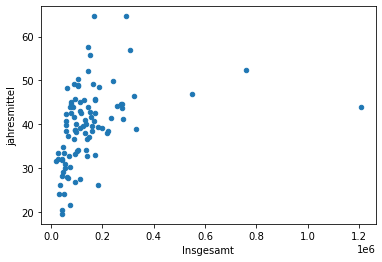

In [80]:
sum_no2.plot(x="Insgesamt", y="jahresmittel",kind="scatter") #xlim=(0,350000)

In [81]:
sum_no2.corr()

,jahresmittel,Insgesamt,dieselanteil
jahresmittel,1.000000,0.367114,0.203145
Insgesamt,0.367114,1.000000,0.013738
dieselanteil,0.203145,0.013738,1.000000


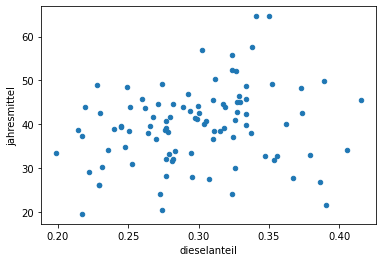

In [82]:
sum_no2.plot(x="dieselanteil", y="jahresmittel",kind="scatter")

In [83]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = sum_no2["Insgesamt"].values.reshape(-1, 1)
train_y = sum_no2["jahresmittel"].values.reshape(-1, 1)
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.12173756e-05]]
Intercept:  [36.41527569]


In [84]:
Y_pred = regr.predict(train_x) 

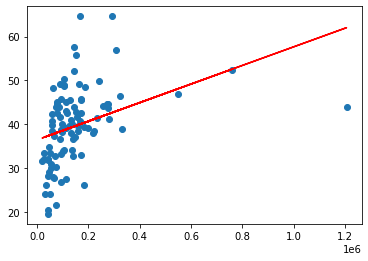

In [85]:
plt.scatter(train_x, train_y)
plt.plot(train_x, Y_pred, color='red')
plt.show()

In [86]:
from sklearn.metrics import r2_score

#train_x = np.asanyarray(test[['ENGINESIZE']])
#train_y = np.asanyarray(test[['CO2EMISSIONS']])
train_y_ = regr.predict(train_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y_ - train_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y_ - train_y) ** 2))
print("R2-score: %.2f" % r2_score(train_y, train_y_) )

Mean absolute error: 6.21
Residual sum of squares (MSE): 66.82
R2-score: 0.13


In [87]:
regr = linear_model.LinearRegression()
train_x = sum_no2["dieselanteil"].values.reshape(-1, 1)
train_y = sum_no2["jahresmittel"].values.reshape(-1, 1)
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[37.68801352]]
Intercept:  [28.31481752]


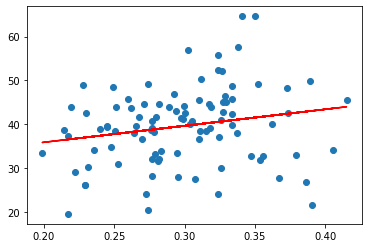

In [88]:
Y_pred = regr.predict(train_x) 
plt.scatter(train_x, train_y)
plt.plot(train_x, Y_pred, color='red')
plt.show()

In [89]:
sum_no2[sum_no2["Insgesamt"] > 400000]

,jahresmittel,Insgesamt,dieselanteil
location,,,
BERLIN BERLIN,43.892857,1.206810e+06,0.251268
HAMBURG HAMBURG,52.375000,7.592280e+05,0.323915
NIEDERSACHSEN HANNOVER,46.772727,5.510505e+05,0.292307


# DROPPED LINES 

In [90]:
sum_no2 = sum_no2[sum_no2["Insgesamt"] < 400000]

In [91]:
from sklearn.metrics import r2_score

#train_x = np.asanyarray(test[['ENGINESIZE']])
#train_y = np.asanyarray(test[['CO2EMISSIONS']])
train_y_ = regr.predict(train_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y_ - train_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y_ - train_y) ** 2))
print("R2-score: %.2f" % r2_score(train_y, train_y_) )

Mean absolute error: 6.64
Residual sum of squares (MSE): 74.04
R2-score: 0.04


In [92]:
year_df[0]

,jahr,bundesland,split,jahresmittel,Insgesamt,dieselanteil,location
3,2012,BADEN-WUERTTEMBERG,FREIBURG,65.0,85591,0.324380,BADEN-WUERTTEMBERG FREIBURG
4,2012,BADEN-WUERTTEMBERG,FREIBURG,50.0,85591,0.324380,BADEN-WUERTTEMBERG FREIBURG
6,2012,BADEN-WUERTTEMBERG,HEIDELBERG,51.0,55499,0.300348,BADEN-WUERTTEMBERG HEIDELBERG
7,2012,BADEN-WUERTTEMBERG,HEIDENHEIM,53.0,73503,0.299321,BADEN-WUERTTEMBERG HEIDENHEIM
10,2012,BADEN-WUERTTEMBERG,KARLSRUHE,46.0,131995,0.312035,BADEN-WUERTTEMBERG KARLSRUHE
...,...,...,...,...,...,...,...
290,2012,THUERINGEN,JENA,38.0,42252,0.249834,THUERINGEN JENA
293,2012,THUERINGEN,SUHL,42.0,19961,0.244978,THUERINGEN SUHL
294,2012,THUERINGEN,SUHL,28.0,19961,0.244978,THUERINGEN SUHL
295,2012,THUERINGEN,WEIMAR,47.0,27342,0.241204,THUERINGEN WEIMAR


In [93]:
grouped = []
for x in year_df:
    grouped.append(x.groupby("location")[["jahresmittel","Insgesamt", "dieselanteil"]].mean())

In [94]:
grouped[0]

,jahresmittel,Insgesamt,dieselanteil
location,,,
BADEN-WUERTTEMBERG FREIBURG,57.500000,85591.0,0.324380
BADEN-WUERTTEMBERG HEIDELBERG,51.000000,55499.0,0.300348
BADEN-WUERTTEMBERG HEIDENHEIM,53.000000,73503.0,0.299321
BADEN-WUERTTEMBERG KARLSRUHE,46.000000,189694.0,0.294489
BADEN-WUERTTEMBERG LUDWIGSBURG,61.000000,292479.0,0.277097
...,...,...,...
THUERINGEN ERFURT,39.666667,89335.0,0.244182
THUERINGEN GERA,41.000000,44787.0,0.213165
THUERINGEN JENA,35.000000,42252.0,0.249834


In [95]:
heatmap = pd.DataFrame(index=grouped[0].index)
for id,year in enumerate(years):
    heatmap[str(year)] = grouped[id]["jahresmittel"]

In [96]:
heatmap

,2012,2013,2014,2015,2016,2017,2018,2019
location,,,,,,,,
BADEN-WUERTTEMBERG FREIBURG,57.500000,54.5,52.5,48.5,41.000000,43.000000,50.000000,36.0
BADEN-WUERTTEMBERG HEIDELBERG,51.000000,46.0,44.0,45.0,42.000000,39.000000,38.000000,34.0
BADEN-WUERTTEMBERG HEIDENHEIM,53.000000,50.0,49.0,48.0,44.000000,41.000000,39.000000,36.0
BADEN-WUERTTEMBERG KARLSRUHE,46.000000,39.0,NaN,NaN,NaN,39.000000,38.000000,34.0
BADEN-WUERTTEMBERG LUDWIGSBURG,61.000000,64.0,61.0,58.0,53.000000,51.000000,51.000000,NaN
...,...,...,...,...,...,...,...,...
THUERINGEN ERFURT,39.666667,38.5,37.0,32.0,33.666667,31.333333,30.666667,26.0
THUERINGEN GERA,41.000000,41.5,34.5,34.0,34.500000,32.500000,33.000000,28.0
THUERINGEN JENA,35.000000,35.5,33.0,31.0,31.000000,31.000000,29.000000,25.0


In [97]:
import seaborn as sns

In [98]:
Index = list(heatmap.index)
Cols = list(heatmap.columns)

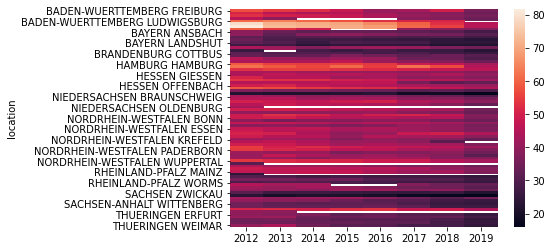

In [99]:
sns.heatmap(heatmap, annot=False)

In [69]:
#heatmap = heatmap[heatmap["2015"]>0]

In [100]:
heatmap[heatmap["2015"] < 0]

,2012,2013,2014,2015,2016,2017,2018,2019
location,,,,,,,,


In [101]:
heatmap = pd.DataFrame(index=grouped[0].index)
for id,year in enumerate(years):
    heatmap[str(year)] = grouped[id]["Insgesamt"]

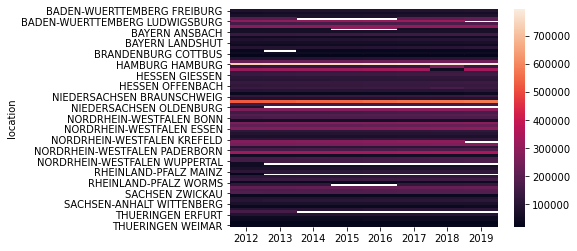

In [102]:
sns.heatmap(heatmap, annot=False)